<div style="color:#777777;background-color:#ffffff;font-size:12px;text-align:right;">
	prepared by Abuzer Yakaryilmaz (QuSoft@Riga) | November 07, 2018
</div>
<table><tr><td><i> I have some macros here. If there is a problem with displaying mathematical formulas, please run me to load these macros.</i></td></td></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\inner}[2]{\langle #1,#2\rangle} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions for </font>Quantum State</h2>

<a id="task1"></a>
<h3> Task 1 </h3>

Let $a$ and $b$ be real numbers.

If the folllowing vectors are valid quantum states, then what can be the values of $a$ and $b$?
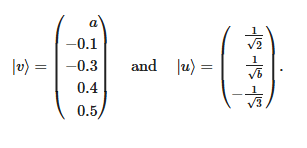



<h3> Solution </h3>

In [ ]:
# vector |v>

print("vector |v>")

values = [-0.1, -0.3, 0.4, 0.5]

total = 0 # summation of squares
for i in range(len(values)):
    total += values[i]**2; # add the square of each value
print("total is ",total)
print("the missing part is",1-total)
print("so, the value a should be",(1-total)**0.5) # sqaure root of the missing part

print()
print("vector |u>")

values = [1/(2**0.5), -1/(3**0.5)]

total = 0 # summation of squares
for i in range(len(values)):
    total += values[i]**2; # add the square of each value
print("total is ",total)
print("the missing part is",1-total)
# the missing part is 1/b, square of 1/sqrt(b)
# thus b is 1/missing-part
print("so, the value b should be",1/(1-total)) 

<a id="task2"></a>
<h3> Task 2</h3>

Remember Hadamard operator:
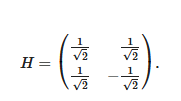

Let's randomly create a 2-dimensional quantum state, and test whether Hadamard operator preserves the length or not.

Write a function that returns a randomly created 2-dimensional quantum state:
<ul>
    <li> Pick a random value between 0 and 100 </li>
    <li> Divide it by 100</li>
    <li> Take sqaure root of it</li>
    <li> Randomly determine its sign ($+$ or $-$)</li>
    <li> This is the first entry of the vector </li>
    <li> Find an appropriate value for the second entry </li>
    <li> Randomly determine its sign ($+$ or $-$)</li>
</ul>

Write a function that determines whether a given vector is a valid quantum state or not.

(Due to precision problem, the summation of squares may not be exactly 1 but very close to 1, e.g., 0.9999999999999998.)

Repeat 10 times:
<ul>
    <li> Randomly create a quantum state </li>
    <li> Multiply Hadamard matrix with the randomly created quantum state </li>
    <li> Check whether the result quantum state is valid </li>
</ul>

<h3> Solution </h3>

In [ ]:
from random import randrange
# randomly create a 2-dimensional quantum state
def random_quantum_state():
    first_entry = randrange(100)
    first_entry = first_entry/100
    first_entry = first_entry**0.5 # we found the first value before determining its sign
    if randrange(2) == 0: # determine the sign
        first_entry = -1 * first_entry
    second_entry = 1 - (first_entry**2)
    second_entry = second_entry**0.5
    if randrange(2) == 0: # determine the sign
        second_entry = -1 * second_entry
    return [first_entry,second_entry]

def is_quantum_state(quantum_state):
    length_square = 0
    for i in range(len(quantum_state)):
        length_square += quantum_state[i]**2
    print("summation of entry squares is",length_square)
    # there might be precision problem
    # the length may be very close to 1 but not exactly 1
    # so we use the following trick
    if (length_square - 1)**2 < 0.00000001: return True 
    return False # else


# define a function for Hadamard multiplication
def hadamard(quantum_state):
    result_quantum_state = [0,0] # define with zero entries
    result_quantum_state[0] = (1/(2**0.5)) * quantum_state[0] + (1/(2**0.5)) * quantum_state[1]
    result_quantum_state[1] = (1/(2**0.5)) * quantum_state[0] - (1/(2**0.5)) * quantum_state[1]
    return result_quantum_state

# we are ready
for i in range(10):
    picked_quantum_state=random_quantum_state()
    print(picked_quantum_state,"this is randomly picked quantum state")
    new_quantum_state = hadamard(picked_quantum_state)
    print(new_quantum_state,"this is new quantum state")
    print("Is it valid?",is_quantum_state(new_quantum_state))
    print() # print an empty line